In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 44kB/s 


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/_LABELED-FISHES-IN-THE-WILD/Training_and_validation'
valid_path = '/content/drive/My Drive/_LABELED-FISHES-IN-THE-WILD/Negatives (seabed)'

In [ ]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/_LABELED-FISHES-IN-THE-WILD/Training_and_validation')

In [ ]:
folders

['/content/drive/My Drive/_LABELED-FISHES-IN-THE-WILD/Training_and_validation']

In [ ]:
# our layers - 
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/_LABELED-FISHES-IN-THE-WILD/Training_and_validation',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 272 images belonging to 1 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/_LABELED-FISHES-IN-THE-WILD/Negatives (seabed)',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 203 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
17/17 [==============================] - 24s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
17/17 [==============================] - 22s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
17/17 [==============================] - 22s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
17/17 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
17/17 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
17/17 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
17/17 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

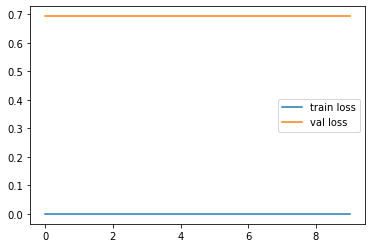

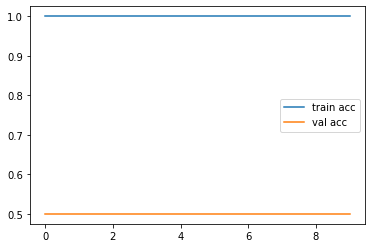

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],